In [1]:
# Import Libraries
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
room_types = os.listdir('../dataset/')
room_types

['bed_room', 'dining_room', 'living_room']

In [3]:
rooms=[]
for room_type in room_types:
    all_room_type=os.listdir('../dataset/'+room_type)
    print(f'{room_type} \n {all_room_type}')
    for room in all_room_type:
        rooms.append((room_type,str("../dataset/"+room_type)+"/"+room))
rooms[:5]

bed_room 
 ['bed-1303451__340.jpg', 'bed-1846251__340.jpg', 'bed-3786264__340.jpg', 'bed-4065946__340.jpg', 'bed-4343379__340.jpg', 'bed-4343382__340.jpg', 'bed-4540208__340.jpg', 'bedroom-3102376__340.jpg', 'bedroom-374982__340.jpg', 'bedroom-4072391__340 (1).jpg', 'bedroom-460762__340.jpg', 'bedroom-690129__340.jpg']
dining_room 
 ['apartment-185778__340.jpg', 'apartment-185779__340.jpg', 'apartment-2094648__340.jpg', 'architectural-224242__340.jpg', 'architecture-3214528__340.jpg', 'cafeteria-544871__340.jpg', 'candles-126159__340.jpg', 'centerpiece-714019__340.jpg', 'chair-3306118__340.jpg', 'chair-3321246__340.jpg', 'dining-2112653__340.jpg']
living_room 
 ['couch-1835923__340.jpg', 'dining-room-332207__340.jpg', 'furniture-998265__340.jpg', 'house-2563735__340.jpg', 'interior-2685521__340.jpg', 'kitchen-2165756__340.jpg', 'kitchen-3690727__340.jpg', 'kitchen-living-room-4043091__340.jpg', 'living-living-room-1644496__340.jpg', 'living-room-1048191__340.jpg', 'living-room-1523480_

[('bed_room', '../dataset/bed_room/bed-1303451__340.jpg'),
 ('bed_room', '../dataset/bed_room/bed-1846251__340.jpg'),
 ('bed_room', '../dataset/bed_room/bed-3786264__340.jpg'),
 ('bed_room', '../dataset/bed_room/bed-4065946__340.jpg'),
 ('bed_room', '../dataset/bed_room/bed-4343379__340.jpg')]

In [4]:
str("../dataset/"+room_type)

'../dataset/living_room'

In [5]:
# convert to df
df=pd.DataFrame(data=rooms, columns=["room_types","room_image"])
df.head()

,room_types,room_image
0,bed_room,../dataset/bed_room/bed-1303451__340.jpg
1,bed_room,../dataset/bed_room/bed-1846251__340.jpg
2,bed_room,../dataset/bed_room/bed-3786264__340.jpg
3,bed_room,../dataset/bed_room/bed-4065946__340.jpg
4,bed_room,../dataset/bed_room/bed-4343379__340.jpg


In [6]:
total_room=len(df)
total_room

47

<Axes: xlabel='room_types', ylabel='count'>

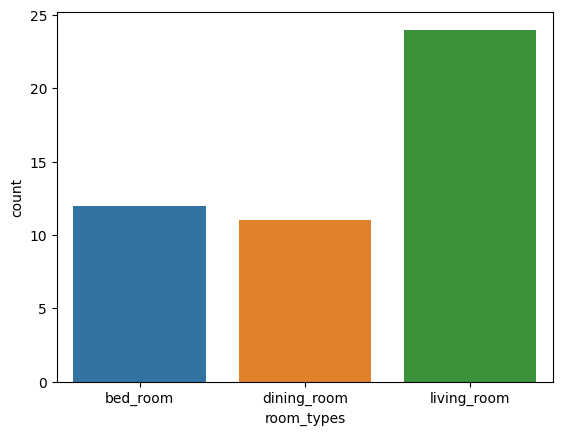

In [7]:
sns.countplot(x=df['room_types'])

In [8]:
df['room_types'].value_counts()


room_types
living_room    24
bed_room       12
dining_room    11
Name: count, dtype: int64

In [9]:
image=cv2.imread("../dataset/bed_room/bed-1303451__340.jpg")
cv2.imshow('bed_room', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
image.shape

(340, 604, 3)

In [11]:
path="../dataset/"
img_size= 60

images=[]
labels=[]

for i in room_types:
    data_path=path + str(i)
    filenames = [i for i in os.listdir(data_path)]
    print(filenames)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        labels.append(i)


['bed-1303451__340.jpg', 'bed-1846251__340.jpg', 'bed-3786264__340.jpg', 'bed-4065946__340.jpg', 'bed-4343379__340.jpg', 'bed-4343382__340.jpg', 'bed-4540208__340.jpg', 'bedroom-3102376__340.jpg', 'bedroom-374982__340.jpg', 'bedroom-4072391__340 (1).jpg', 'bedroom-460762__340.jpg', 'bedroom-690129__340.jpg']
['apartment-185778__340.jpg', 'apartment-185779__340.jpg', 'apartment-2094648__340.jpg', 'architectural-224242__340.jpg', 'architecture-3214528__340.jpg', 'cafeteria-544871__340.jpg', 'candles-126159__340.jpg', 'centerpiece-714019__340.jpg', 'chair-3306118__340.jpg', 'chair-3321246__340.jpg', 'dining-2112653__340.jpg']
['couch-1835923__340.jpg', 'dining-room-332207__340.jpg', 'furniture-998265__340.jpg', 'house-2563735__340.jpg', 'interior-2685521__340.jpg', 'kitchen-2165756__340.jpg', 'kitchen-3690727__340.jpg', 'kitchen-living-room-4043091__340.jpg', 'living-living-room-1644496__340.jpg', 'living-room-1048191__340.jpg', 'living-room-1523480__340.jpg', 'living-room-2037945__340.jp

In [12]:
images[0].shape

(60, 60, 3)

In [13]:
images[0]

array([[[ 55,  62,  65],
        [ 75,  88,  96],
        [ 79,  92, 100],
        ...,
        [ 50,  50,  50],
        [ 11,  11,  11],
        [ 50,  51,  51]],

       [[ 55,  64,  68],
        [ 74,  89,  98],
        [ 77,  89,  99],
        ...,
        [ 53,  53,  53],
        [ 29,  29,  29],
        [ 42,  42,  42]],

       [[ 56,  66,  73],
        [ 69,  86,  96],
        [ 64,  78,  84],
        ...,
        [ 44,  44,  44],
        [ 63,  63,  63],
        [ 21,  19,  19]],

       ...,

       [[ 12,  11,  13],
        [ 14,  13,  15],
        [ 52,  51,  53],
        ...,
        [170, 173, 171],
        [225, 231, 232],
        [230, 243, 244]],

       [[ 15,  14,  16],
        [ 13,  12,  14],
        [ 38,  37,  39],
        ...,
        [183, 184, 182],
        [243, 248, 249],
        [251, 255, 255]],

       [[ 12,  12,  12],
        [ 10,  10,  10],
        [ 17,  16,  18],
        ...,
        [172, 172, 172],
        [249, 253, 253],
        [255, 255, 255]]

In [14]:
# Transfer image array to a np type

images=np.array(images)
images.shape

(47, 60, 60, 3)

In [15]:
y=df['room_types'].values

print(y[:5])

['bed_room' 'bed_room' 'bed_room' 'bed_room' 'bed_room']


In [16]:
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2]


In [17]:
y = y.reshape(-1,1)
ct = ColumnTransformer([("room_type", OneHotEncoder(), [0])], remainder = 'passthrough')
Y = ct.fit_transform(y)
Y.shape

(47, 3)

In [18]:
# Split dataset

images, Y = shuffle(images, Y, random_state=42)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.1, random_state=1)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(42, 60, 60, 3)
(42, 3)
(5, 60, 60, 3)
(5, 3)


In [19]:
print(train_x)

[[[[237 233 224]
   [220 214 190]
   [192 189 160]
   ...
   [239 236 228]
   [240 234 227]
   [239 234 229]]

  [[236 228 222]
   [226 224 200]
   [228 223 199]
   ...
   [238 235 227]
   [241 235 228]
   [236 230 225]]

  [[238 228 223]
   [226 226 203]
   [233 226 205]
   ...
   [237 234 226]
   [236 230 223]
   [213 214 217]]

  ...

  [[ 18  21  26]
   [ 17  20  25]
   [ 18  21  25]
   ...
   [ 55  58  77]
   [ 50  54  72]
   [ 48  52  70]]

  [[ 18  21  25]
   [ 16  19  23]
   [ 18  21  25]
   ...
   [ 54  58  77]
   [ 57  61  79]
   [ 51  55  74]]

  [[ 18  21  25]
   [ 16  19  23]
   [ 15  18  22]
   ...
   [ 59  63  81]
   [ 48  52  70]
   [ 52  57  75]]]


 [[[114 130 146]
   [118 139 157]
   [125 150 166]
   ...
   [178 181 179]
   [174 176 176]
   [170 172 172]]

  [[130 149 162]
   [119 138 151]
   [123 142 157]
   ...
   [176 179 177]
   [171 176 175]
   [169 174 173]]

  [[130 150 169]
   [137 153 169]
   [137 156 171]
   ...
   [176 179 177]
   [170 176 175]
   [166 172